# Math 124 - Programming for Mathematical Applications
UC Berkeley, Spring 2021

## Project 1 - The Trapped Knight
Due Friday, February 12

### Description

In this project, you will write a computer code to generate a particular sequence of numbers described in the following YouTube video: [The Trapped Knight](https://www.youtube.com/watch?v=RGQe8waGJ4w)

Begin by watching the video and make sure you understand exactly how the sequence is generated. Then continue to implement the code in the 3 parts described below.

### Part 1 - Initialize the board

We will store the chess board in a 2d-array of integers. The size of the board is $(2n+1)$-by-$(2n+1)$, for a given integer $n$. This means the board extends from the center square by $n$ steps in all directions.

The first step is to initialize the board by filling it with the integers described in the video. Finish the implementation of the function definition in the cell below such that it returns this "spiral pattern" for any given input parameter $n$.

An example is given below: for the following input
```julia
board = initialize_board(3)
```
the correct output is
```julia
7×7 Array{Int64,2}:
 37  36  35  34  33  32  31
 38  17  16  15  14  13  30
 39  18   5   4   3  12  29
 40  19   6   1   2  11  28
 41  20   7   8   9  10  27
 42  21  22  23  24  25  26
 43  44  45  46  47  48  49
```

Test your function for various values of $n$ to make sure it is correct before you continue.

*Hints*:
- Note that since Julia uses 1-based indexing, the center square of the array `board` is given by element `board[n+1,n+1]`.
- After the center $1$ has been placed, there are exactly $n$ "circles" of numbers of increasing radius. This is naturally implemented using a for-loop.
- In each "circle", there are 4 segments going up, left, down, and right. These are also naturally implemented using a sequence of 4 for-loops.

In [650]:
function initialize_board(n)
    C = zeros(Int, (2*n)+1,(2*n)+1)
    C[n+1,n+1] = 1
    row = 1
    col = 1
    start = (2n+1)^2
    rowend = 2n+1
    colend = 2n+1
    while row <= rowend && col <= colend
        for i in colend:-1:col
            C[rowend, i] = start
            start -= 1
        end
        rowend -= 1
        
        for i in rowend:-1:row
            C[i, col] = start
            start -= 1
        end
        col += 1
       
        for i in col:colend
            C[row, i] = start
            start -= 1
        end
        row += 1        
       
        for i in row:rowend
            C[i, colend] = start
            start -= 1
        end
        colend -= 1        
        
    end
    return C
end
initialize_board(3)

7×7 Array{Int64,2}:
 37  36  35  34  33  32  31
 38  17  16  15  14  13  30
 39  18   5   4   3  12  29
 40  19   6   1   2  11  28
 41  20   7   8   9  10  27
 42  21  22  23  24  25  26
 43  44  45  46  47  48  49

### Part 2 - Simulate the walk

Next we will write the function to simulate the walk and produce the sequence. This function will take an initialized board as input, and produce a list of numbers as well as the corresponding x- and y-coordinates.

For example, the following input:
```julia
board = initialize_board(2)
display(board)
seq, xs, ys = simulate_walk(board);
println("Sequence = ", seq)
println("x-coordinates = ", xs)
println("y-coordinates = ", ys)
```
should produce the following correct output:
```julia
5×5 Array{Int64,2}:
 17  16  15  14  13
 18   5   4   3  12
 19   6   1   2  11
 20   7   8   9  10
 21  22  23  24  25
Sequence = [1, 10, 3, 6, 9, 4, 7, 2, 5, 8, 11, 14]
x-coordinates = [0, 2, 1, -1, 1, 0, -1, 1, -1, 0, 2, 1]
y-coordinates = [0, 1, -1, 0, 1, -1, 1, 0, -1, 1, 0, -2]
```

Again test your code, first using small values of $n$ as shown above, which makes it easier to look at the results and find errors.

*Hints*:
- It is convenient to create another 2d-array of booleans, indicating if a square has been visited or not.
- Make sure you never allow the knight to jump outside the board. That is, the only valid positions are $n$ steps from the center square in either direction

In [651]:
function simulate_walk(board)
    
board_radius = Int(floor(size(board,1)/2))

bigger_board = initialize_board(board_radius+2)

bigger_board_radius = Int(floor(size(bigger_board,1)/2))

#discard numbers that knight jumps greater than (2n+1)^2

a = 1
b = (5,5)
potential_landing_squares = []
list = [1]
coordinate_list = [(bigger_board_radius+1,bigger_board_radius+1)] #coordinate_list is x & y coordinate for the middle number, in this case it is radius + 1
#x_y_coordinates = coordinate_list .- (3,3)

last_coordinate = (bigger_board_radius+1, bigger_board_radius+1)

#[(1,2), (2,1), (-1,2), (2,-1), (-2,1), (1, -2), (-2, -1), (-1, -2)]
while true
    
    for i = -1:2:1
        p = (last_coordinate[1]+i, last_coordinate[2]+2)
        push!(potential_landing_squares, p)
    end


    for i = -1:2:1
        p = (last_coordinate[1]+i, last_coordinate[2]-2)
        push!(potential_landing_squares, p)
    end


    for i = -1:2:1
        p = (last_coordinate[1]+2, last_coordinate[2]+i)
        push!(potential_landing_squares, p)
    end


    for i = -1:2:1
        p = (last_coordinate[1]-2, last_coordinate[2]+i)
        push!(potential_landing_squares, p)
    end

    Z = []
    for i = 1:length(potential_landing_squares)
        z = bigger_board[(potential_landing_squares[i])[1],(potential_landing_squares[i])[2]]
        if z != 0 && z <= (2*board_radius+1)^2
            push!(Z, z)
        else
        end
    end
    Z
    if Z == []
        break
    end
    q = sort(Z)[1]
    push!(list, q)
    list

    bigger_board[last_coordinate[1],last_coordinate[2]] = 0

    for i = 1:length(potential_landing_squares)
        if bigger_board[potential_landing_squares[i][1],potential_landing_squares[i][2]] == q
            last_coordinate = potential_landing_squares[i]
            push!(coordinate_list, last_coordinate)
        end
    end
    Z = []
    potential_landing_squares = []
    last_coordinate
    
    xs = []
    ys = []
    for i = 1:length(coordinate_list)
        x_coordinates = coordinate_list[i][2]
        push!(xs, x_coordinates)
        y_coordinates = coordinate_list[i][1]
        push!(ys, y_coordinates)
    end
end
    
seq = list
xs = xs .- (bigger_board_radius+1)
ys = ys .- (bigger_board_radius+1)
seq, xs, ys


    
    
end

board = initialize_board(2)
display(board)
seq, xs, ys = simulate_walk(board);
println("Sequence = ", seq)
println("x-coordinates = ", xs)
println("y-coordinates = ", ys)

5×5 Array{Int64,2}:
 17  16  15  14  13
 18   5   4   3  12
 19   6   1   2  11
 20   7   8   9  10
 21  22  23  24  25

Sequence = [1, 10, 3, 6, 9, 4, 7, 2, 5, 8, 11, 14]
x-coordinates = [0, 2, 1, -1, 1, 0, -1, 1, -1, 0, 2, 1]
y-coordinates = [0, 1, -1, 0, 1, -1, 1, 0, -1, 1, 0, -2]


### Part 3 - Generate the full sequence and plot the path

Finally, use your code to generate the full sequence ($n=100$ is sufficient), output the *last* number, and plot the path by straight lines between all the visited x,y-coordinates.

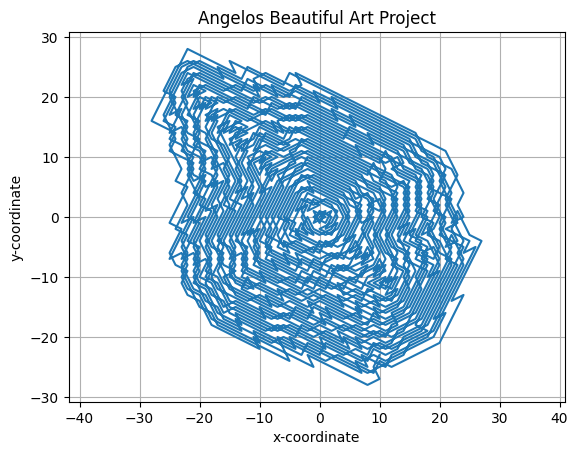

Last Number of Sequence = 2084


In [652]:
board = initialize_board(100)
seq, xs, ys = simulate_walk(board)
e = last(seq)
using PyPlot 

plot(xs, ys)
axis("equal")
grid(true)
xlabel("x-coordinate")
ylabel("y-coordinate")
title("Angelos Beautiful Art Project");
println("Last Number of Sequence = ",e)